#### やること再確認
1. ランダムな値を返すANDメソッドを用意
2. ランダムな値を返すANDメソッドの誤差を出せるようにする
3. 学習をさせて、正答率が高い重みをつけれるようにする
4. XORに発展させる

# このノートでやる事
↑の4番の部分について

In [1]:
import numpy as np

In [2]:
# 二乗和誤差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

mean_squared_error(np.random.rand(5), np.random.rand(5))

0.44476538464379373

In [3]:
# シグモイド関数
def sigmoid(x):
    # STEP関数の形状に近づけるためにbetaを大きくする
    beta = 10
    return 1 / (1 + np.exp(-x * beta))

sigmoid(0.1)

0.7310585786300049

In [35]:
# 多次元配列対応版
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/common/gradient.py
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

# 適当なLOSS関数的なもの
# 動作確認用
def example_function(x):
    return np.sum(x**2)

numerical_gradient(example_function, np.array([3.0, 4.0, 5.0]))

array([ 6.,  8., 10.])

In [5]:
class SimpleNet:
    def __init__(self):
        self.params = {}
        self.params['W'] = np.random.rand(2)
        self.params['b'] = np.random.rand(1) * -1
        
    def predict(self, x):
        a = np.dot(x, self.params['W']) + self.params['b']
        return sigmoid(a)
        
    def loss(self, x, t):
        y = self.predict(x)
        # 二乗和誤差を利用しているが、
        # クロスエントロピー誤差にしたらもっと学習効率あがるのかもしれない
        return mean_squared_error(y, t)
        
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        grads = {}
        grads['W'] = numerical_gradient(loss_W, self.params['W'])
        grads['b'] = numerical_gradient(loss_W, self.params['b'])
        return grads

In [6]:
# 全部で4パターン
x = [[0,0], [0,1], [1,0], [1,1]]

# XORの回答データ
t = [0,1,1,0]

# まずは、ANDで作ったnodeが2つのネットワークで学習が進まない事を確認する
net = SimpleNet()
net.predict(x)

# 学習率
learning_rate = 0.05

# 誤差がどれだけか記録をつける
train_loss_list = []

# 1万回学習させてみる
for i in range(10000):
    grad = net.numerical_gradient(x, t)
    for key in ('W', 'b'):
        net.params[key] -= learning_rate * grad[key]
        loss = net.loss(x, t)
        train_loss_list.append(loss)

In [7]:
# やってもやっても誤差が小さくならない事がわかる
train_loss_list

[0.50686168398980069,
 0.50616432882108997,
 0.50616432873394201,
 0.50559148940233922,
 0.50559148929281283,
 0.50511304137560964,
 0.5051130412407665,
 0.50470777165963154,
 0.50470777149646806,
 0.5043603286891909,
 0.50436032849464552,
 0.50405933977634354,
 0.50405933954730364,
 0.50379620740278708,
 0.50379620713609385,
 0.50356431586184058,
 0.50356431555429382,
 0.50335849430522783,
 0.50335849395359045,
 0.50317464473954743,
 0.50317464434054948,
 0.50300947890389891,
 0.50300947845424027,
 0.5028603286829646,
 0.50286032817931858,
 0.5027250072127879,
 0.50272500665180275,
 0.50260170558356787,
 0.50260170496187084,
 0.50248891496052872,
 0.50248891427472797,
 0.50238536713278892,
 0.5023853663794754,
 0.50228998860938545,
 0.50228998778513401,
 0.50220186480209228,
 0.50220186390346522,
 0.50212021180718924,
 0.50212021083073721,
 0.50204435397432889,
 0.50204435291659155,
 0.50197370592708768,
 0.50197370478459646,
 0.50190775804007504,
 0.50190775680935507,
 0.501846064623

In [8]:
# 0,0で確認 => Falseのはず
net.predict([0,0])

array([ 0.0066852])

In [9]:
# 0,1で確認 => Trueのはず
net.predict([0,1])

array([ 0.99574658])

In [10]:
# 1,0で確認 => Trueのはず
net.predict([1,0])

array([ 0.99579133])

In [11]:
# 1,1で確認 => Falseのはず
net.predict([1,1])

array([ 0.99999988])

In [30]:
np.array([np.random.rand(3), np.random.rand(3)]).shape

(2, 3)

In [22]:
class ThreeNodeNet:
    def __init__(self):
        self.params = {}
        self.params['W1'] = np.array([np.random.rand(3), np.random.rand(3)]) 
        self.params['b1'] = np.random.rand(3) * -1
        self.params['W2'] = np.random.rand(3)
        self.params['b2'] = np.random.rand(1)
        
    def predict(self, x):
        A1 = np.dot(x, self.params['W1']) + self.params['b1']
        Z1 = sigmoid(A1)
        A2 = np.dot(Z1, self.params['W2']) + self.params['b2']
        Z2 = sigmoid(A2)
        return Z2
        
    def loss(self, x, t):
        y = self.predict(x)
        # 二乗和誤差を利用しているが、
        # クロスエントロピー誤差にしたらもっと学習効率あがるのかもしれない
        return mean_squared_error(y, t)
        
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

In [36]:
net2 = ThreeNodeNet()
net2.predict(x)

# 学習率
learning_rate2 = 0.05

# 誤差がどれだけか記録をつける
train_loss_list2 = []

# 1万回学習させてみる
for i in range(10000):
    grad = net2.numerical_gradient(x, t)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net2.params[key] -= learning_rate2 * grad[key]
        loss = net2.loss(x, t)
        train_loss_list2.append(loss)

In [41]:
import matplotlib.pyplot as plt
plt.plot(train_loss_list2)

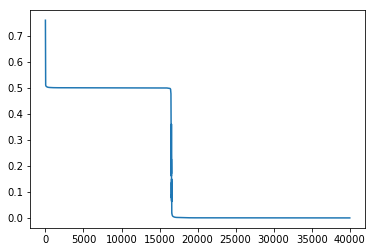

In [42]:
plt.show()

In [44]:
net2.predict([0,0])

array([ 0.00534054])

In [45]:
net2.predict([0,1])

array([ 0.99569739])

In [46]:
net2.predict([1,0])

array([ 0.99380263])

In [47]:
net2.predict([1,1])

array([ 0.00616899])